# Aggregation Histograms
This script reads the .dat file got from clustsize and create plots

In [1]:
concentration = 13
replica_number = 1
dt = 1000
cdt = 100000
temperature = 304
nchains = 2000

In [2]:
folder = f'make_fibril_{nchains}_{concentration}mM_{temperature}K_analysis_test'
%cd $folder
%cd analysis/

def write_output(value_to_write, name):
    w = open(f'plot_{name}_dt{cdt}.txt', 'w')
    w.write(value_to_write.to_string())
    w.close()

/media/data/emanuele/TTR/greta_test_cutoff_55_ex_3/epsilon_0295_c12_Native2reweight_noN1_gd0/concentration_gradient/make_fibril_2000_13mM_304K_analysis_test
/media/data/emanuele/TTR/greta_test_cutoff_55_ex_3/epsilon_0295_c12_Native2reweight_noN1_gd0/concentration_gradient/make_fibril_2000_13mM_304K_analysis_test/analysis


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib.colors import ListedColormap

### Data import
matrix = pd.read_csv(f'matrix-dt{cdt}.dat', sep = '\\s+', header = None)

# Changing the index so now it is in picoseconds
#matrix[0] = matrix[0].apply(lambda x:x*10)
#matrix = matrix.set_index([0])

### Data handling
#### Defining the Maxclust and the number of frames
clustsize = list(range(0, len(matrix.columns), 1))
frames = list(range(0, len(matrix.index), 1))
fibril = list(range(2, len(matrix.columns)))
#not_fibril = list(range(3, 10, 1))


#### Multiply the columns for its clustsize
size = pd.Series(clustsize)
matrix = matrix.mul(size, axis = 1)

#### Replace 0 with n.an
matrix[matrix == 0] = np.nan

#### I don't care about monomers
matrix = matrix.drop([0, 1], axis = 1)

### Make the histogram to compare with lab results
# Set the not-fibril to 0 and have a sort of lag time 
histo_norm = matrix.copy()
histo_norm[[2, 3, 4, 5, 6, 7, 8, 9, 10]] = 0
histo_norm = histo_norm[fibril].sum(axis=1)

# This one is the complete one
histogram = matrix[fibril].sum(axis=1)

# Matrix transpose
matrix = matrix.T

#print(matrix.to_string())

In [4]:
write_output(matrix, 'matrix')
write_output(histo_norm, 'histo_norm')
write_output(histogram, 'histogram')

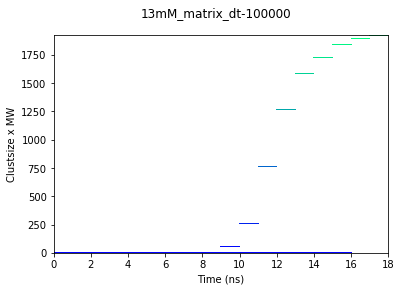

In [5]:
#prova = ListedColormap(['darkorange', 'gold', 'lawngreen', 'lightseagreen'])
plt.pcolormesh(matrix, cmap = 'winter', rasterized = True)
plt.ylabel('Clustsize x MW')
plt.xlabel('Time (ns)')
#plt.xlim(0, 2000)
plt.suptitle(f'{concentration}mM_matrix_dt-{cdt}')
plt.savefig(f'{concentration}mM_matrix_dt-{cdt}.png', dpi = 800)
plt.show()

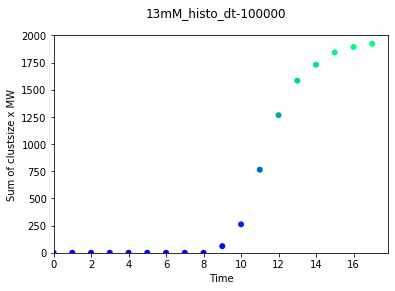

In [6]:
plt.scatter(frames, histo_norm, edgecolor = 'none', c=histo_norm, cmap='winter')
plt.ylabel('Sum of clustsize x MW')
plt.xlabel('Time')
plt.ylim(0, 2000)
plt.suptitle(f'{concentration}mM_histo_dt-{cdt}')
plt.savefig(f'{concentration}mM_histo_dt-{cdt}.png', dpi = 800, figsize = (10,10))
plt.xlim(xmin=0)
plt.show()

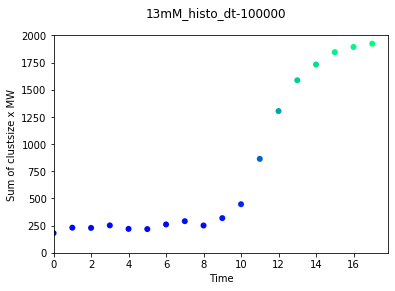

In [7]:
plt.scatter(frames, histogram, edgecolor = 'none', c=histogram, cmap='winter')
plt.ylabel('Sum of clustsize x MW')
plt.xlabel('Time')
plt.ylim(0, 2000)
plt.suptitle(f'{concentration}mM_histo_dt-{cdt}')
plt.savefig(f'{concentration}mM_histo_dt-{cdt}.png', dpi = 800, figsize = (10,10))
plt.xlim(xmin=0)
plt.show()